In [1]:
% pylab inline
import os
import pandas as pd
import librosa
import librosa.display as display
import glob 

plt.figure(figsize=(12, 4))

Populating the interactive namespace from numpy and matplotlib


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

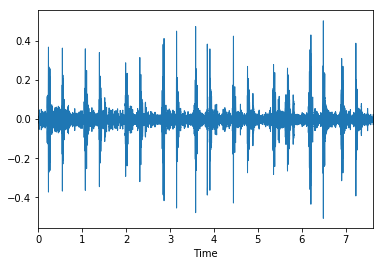

In [2]:
data, sampling_rate = librosa.load('normal/normal__109_1305653646620_C.wav')
display.waveplot(data, sr=sampling_rate)

In [50]:
def extract_data(folder):
    # function to load files and extract features
    file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            # here kaiser_fast is a technique used for faster extraction
            X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
            # we extract mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [51]:
normal_onehot = 1
murmur_onehot = 0

normal_sounds = extract_data("normal")
normal_labels = [normal_onehot for items in normal_sounds]
murmur_sounds = extract_data("murmur")
x_test = extract_data("test")
murmur_labels = [murmur_onehot for items in murmur_sounds]
x_train = np.concatenate((normal_sounds, murmur_sounds))
y_train = np.concatenate((normal_labels, murmur_labels))

In [52]:
x_train[5].shape

(40, 1)

In [56]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Build LSTM RNN model ...


In [57]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
266/266 [==============================] - 5s 19ms/step - loss: 0.6492 - acc: 0.6692
Epoch 2/100
266/266 [==============================] - 1s 3ms/step - loss: 0.5373 - acc: 0.7707
Epoch 3/100
266/266 [==============================] - 1s 3ms/step - loss: 0.5294 - acc: 0.7707
Epoch 4/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4965 - acc: 0.7782
Epoch 5/100
266/266 [==============================] - 1s 3ms/step - loss: 0.5068 - acc: 0.7782A: 0s - loss: 0.5074 - acc: 0.777
Epoch 6/100
266/266 [==============================] - 1s 3ms/step - loss: 0.5005 - acc: 0.7857
Epoch 7/100
266/266 [==============================] - 1s 3ms/step - loss: 0.5071 - acc: 0.7932
Epoch 8/100
266/266 [==============================] - 1s 3ms/step - loss: 0.5068 - acc: 0.7744
Epoch 9/100
266/266 [==============================] - 1s 3ms/step - loss: 0.5001 - acc: 0.7820
Epoch 10/100
266/266 [==============================] - 1s 3ms/step - loss: 0.5085 - acc: 0.7932
Epoch

266/266 [==============================] - 1s 3ms/step - loss: 0.4250 - acc: 0.8271
Epoch 86/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4243 - acc: 0.8383
Epoch 87/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4047 - acc: 0.8271
Epoch 88/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4400 - acc: 0.8271
Epoch 89/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4189 - acc: 0.8346
Epoch 90/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4196 - acc: 0.8271
Epoch 91/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4219 - acc: 0.8158A: 0s - loss: 0.4373 - acc: 0.80
Epoch 92/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4158 - acc: 0.8308A: 0s - loss: 0.4095 - acc: 0.835
Epoch 93/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4066 - acc: 0.8271A: 0s - loss: 0.3640 - acc:
Epoch 94/100
266/266 [==========================

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 40, 64)            16896     
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.predict(np.arrary(x_test)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 11 arrays: [array([[-4.67653275e+02],
       [ 1.89769461e+02],
       [ 5.29820442e+01],
       [-2.04252808e+01],
       [ 1.02796503e+00],
       [ 3.92504167e+01],
       [ 2.96702975e+01],
       [-4.416238...